In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Tomato/Val/Early Blight/a3d07302-420d-4b4e-94f2-6694ef9d2088___RS_Erly.B 7652.JPG
/kaggle/input/Tomato/Val/Early Blight/dc6eeebe-ebc4-406c-b5df-f4861f491db8___RS_Erly.B 9615_180deg.JPG
/kaggle/input/Tomato/Val/Early Blight/bef16984-17c5-4796-9496-85808dfa3a56___RS_Erly.B 9405.JPG
/kaggle/input/Tomato/Val/Early Blight/9744fa97-16b3-4a16-afc0-c86ac0397759___RS_Erly.B 6411_flipTB.JPG
/kaggle/input/Tomato/Val/Early Blight/e332b0b1-ed0c-49b0-aad2-da29a8636126___RS_Erly.B 9418.JPG
/kaggle/input/Tomato/Val/Early Blight/a8b2bbbc-5bef-4ef4-8322-48cde639a9aa___RS_Erly.B 7438_flipTB.JPG
/kaggle/input/Tomato/Val/Early Blight/8039671d-c264-49aa-bfbc-81fabe24b007___RS_Erly.B 9397_180deg.JPG
/kaggle/input/Tomato/Val/Early Blight/2f3c483a-b18d-4571-8c00-fb24f166d328___RS_Erly.B 7667.JPG
/kaggle/input/Tomato/Val/Early Blight/eefcdf5d-5207-47ca-916d-0479f010bae8___RS_Erly.B 9482_180deg.JPG
/kaggle/input/Tomato/Val/Early Blight/1dad664e-ec73-474e-aaf9-a832ca212e3f___RS_Erly.B 7533.JPG
/kagg

## Importing Libraries

In [2]:
# Import the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

# lists all the files in the directory
from glob import glob

# used for audio processing
import librosa
import librosa.display

# playing audio files in the notebook
import IPython.display as ipd

# import test train split for stratified sampling
from sklearn.model_selection import train_test_split

# import deep learing modules
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Input
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import BatchNormalization
from imblearn.over_sampling import SMOTE
from tensorflow.keras.utils import to_categorical

from torchvision.datasets import ImageFolder
from torchvision.transforms import transforms
from torch.utils.data import DataLoader

import os
import shutil

## Function to Reorganize and Rename Tomato Dataset

In [3]:
import os


# List the contents of /kaggle/input to see available datasets
input_dir = "/kaggle/input"
print("Contents of /kaggle/input:")
print(os.listdir(input_dir))



Contents of /kaggle/input:
['Tomato', 'Apple', 'Bell Pepper', 'Strawberry', 'Corn (Maize)', 'Peach', 'Grape', 'Cherry', 'Potato']


In [4]:
import os
import shutil

def rename_and_merge_tomato(source_path, destination_path):
    tomato_path = os.path.join(source_path, "Tomato")  # Target only the Tomato folder

    print(f"Checking Tomato path: {tomato_path}")  # Print to verify the path
    if os.path.isdir(tomato_path):
        print(f"Found Tomato directory: {tomato_path}")

        for split in ['Train', 'Val', 'Test']:  # Loop through Train, Val, Test
            split_path = os.path.join(tomato_path, split)
            if os.path.isdir(split_path):
                print(f"Found split: {split_path}")

                for condition in os.listdir(split_path):  # E.g., Healthy, Late Blight
                    condition_path = os.path.join(split_path, condition)

                    # Check if the condition directory exists and is not hidden
                    if os.path.isdir(condition_path) and not condition.startswith('.'):
                        print(f"Found condition folder: {condition_path}")
                        
                        # Handle naming convention for the new folder
                        if condition.lower() == "healthy":
                            new_folder_name = f"Tomato_Healthy"
                        else:
                            new_folder_name = f"Tomato_{condition.replace(' ', '_')}"
                        
                        # Create the destination folder if not exists
                        target_folder = os.path.join(destination_path, split, new_folder_name)
                        os.makedirs(target_folder, exist_ok=True)
                        print(f"Created target folder: {target_folder}")
                        
                        # Now, move the images to the renamed folder
                        for img in os.listdir(condition_path):
                            img_path = os.path.join(condition_path, img)
                            
                            if os.path.isfile(img_path):  # Ensure it's a file
                                dest_path = os.path.join(target_folder, img)
                                shutil.copy(img_path, dest_path)
                                print(f"Moved file {img} to {target_folder}")
                    else:
                        print(f"Condition folder is not valid or hidden: {condition_path}")
            else:
                print(f"Split folder does not exist: {split_path}")
    else:
        print(f"Tomato directory not found at {tomato_path}")

# Paths to source and destination
source_path = "/kaggle/input"
destination_path = "/kaggle/working/"

# Execute the function for Tomato
rename_and_merge_tomato(source_path, destination_path)
print("Tomato dataset reorganized and renamed successfully!")


Checking Tomato path: /kaggle/input/Tomato
Found Tomato directory: /kaggle/input/Tomato
Found split: /kaggle/input/Tomato/Train
Found condition folder: /kaggle/input/Tomato/Train/Early Blight
Created target folder: /kaggle/working/Train/Tomato_Early_Blight
Moved file e56354a5-5e3f-4ed6-bfe5-3c783a32dc98___RS_Erly.B 9413_flipTB.JPG to /kaggle/working/Train/Tomato_Early_Blight
Moved file cf8c6e28-201c-4c8e-994f-8dcf98362e64___RS_Erly.B 7651.JPG to /kaggle/working/Train/Tomato_Early_Blight
Moved file e11ee1f8-8de2-4d9c-a0c1-86bc42350fd9___RS_Erly.B 9472.JPG to /kaggle/working/Train/Tomato_Early_Blight
Moved file e94d68c8-f185-4b3d-9b44-ad12e3dc891d___RS_Erly.B 9598.JPG to /kaggle/working/Train/Tomato_Early_Blight
Moved file cf7acf3d-e079-4587-b3e8-bafe507c40d5___RS_Erly.B 8246_180deg.JPG to /kaggle/working/Train/Tomato_Early_Blight
Moved file c35fc6de-4796-4f7a-a350-7bff160cbbd5___RS_Erly.B 7740_180deg.JPG to /kaggle/working/Train/Tomato_Early_Blight
Moved file 99cfe9bb-77a1-4bd6-9c48-58f

## Preparing the Tomato Dataset for Training with DataLoaders

In [5]:
# Paths for the renamed dataset
TRAIN_PATH = '/kaggle/working/Train'
VAL_PATH = '/kaggle/working/Val'
TEST_PATH = '/kaggle/working/Test'

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load datasets
train_dataset = ImageFolder(TRAIN_PATH, transform=transform)
val_dataset = ImageFolder(VAL_PATH, transform=transform)
test_dataset = ImageFolder(TEST_PATH, transform=transform)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Print class names
print(f"Classes: {train_dataset.classes}")
print(f"Number of classes: {len(train_dataset.classes)}")
print(f"Training samples: {len(train_dataset)}")
print(f"Validation samples: {len(val_dataset)}")
print(f"Test samples: {len(test_dataset)}")

Classes: ['Tomato_Bacterial_Spot', 'Tomato_Early_Blight', 'Tomato_Healthy', 'Tomato_Late_Blight', 'Tomato_Septoria_Leaf_Spot', 'Tomato_Yellow_Leaf_Curl_Virus']
Number of classes: 6
Training samples: 11105
Validation samples: 2495
Test samples: 280


#SVM


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Validation Accuracy: 0.98
Test Accuracy: 0.99

Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        43
           1       1.00      0.96      0.98        48
           2       1.00      1.00      1.00        49
           3       0.96      1.00      0.98        47
           4       0.98      0.98      0.98        44
           5       1.00      0.98      0.99        49

    accuracy                           0.99       280
   macro avg       0.99      0.99      0.99       280
weighted avg       0.99      0.99      0.99       280



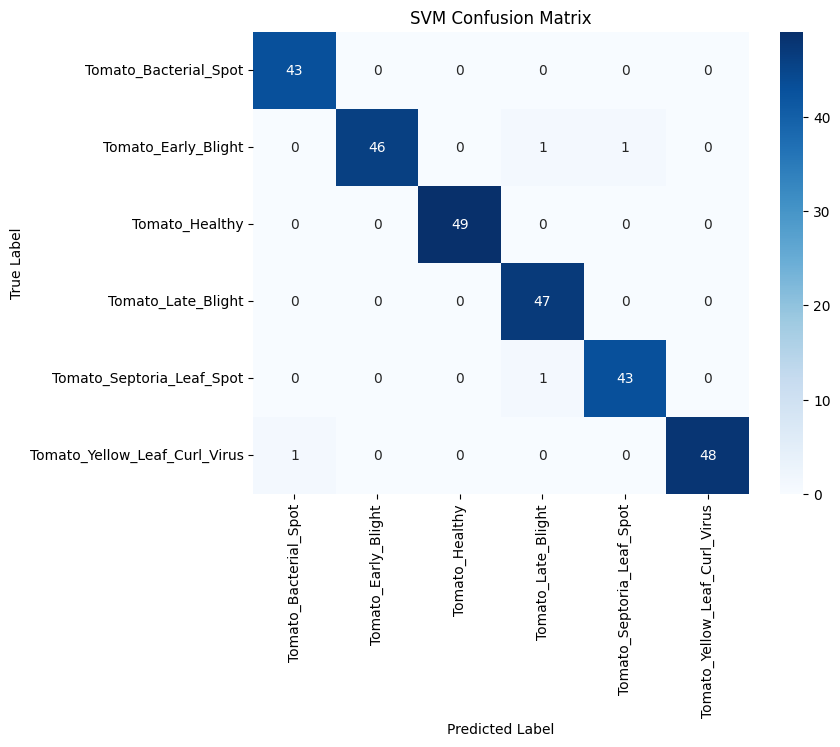

In [9]:
import torch
import torchvision.models as models
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load a pre-trained model (e.g., ResNet18) for feature extraction
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet18 = models.resnet18(pretrained=True)
resnet18 = resnet18.to(device)
resnet18.eval()  # Set to evaluation mode

# Function to extract features using the pre-trained model
def extract_features(data_loader, model, device):
    features = []
    labels = []
    with torch.no_grad():
        for inputs, targets in data_loader:
            inputs = inputs.to(device)
            outputs = model(inputs)
            features.append(outputs.cpu().numpy())
            labels.append(targets.numpy())
    return np.vstack(features), np.hstack(labels)

# Modify the model to remove the fully connected layer
resnet18_feature_extractor = torch.nn.Sequential(*(list(resnet18.children())[:-1]))  # Remove the FC layer

# Extract features from training, validation, and test datasets
train_features, train_labels = extract_features(train_loader, resnet18_feature_extractor, device)
val_features, val_labels = extract_features(val_loader, resnet18_feature_extractor, device)
test_features, test_labels = extract_features(test_loader, resnet18_feature_extractor, device)

# Flatten the feature vectors
train_features = train_features.reshape(train_features.shape[0], -1)
val_features = val_features.reshape(val_features.shape[0], -1)
test_features = test_features.reshape(test_features.shape[0], -1)

# Scale features to ensure uniform contribution
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

# Train SVM model
svm_model = svm.SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42, class_weight='balanced')
svm_model.fit(train_features, train_labels)

# Validate the SVM model
val_predictions = svm_model.predict(val_features)
val_accuracy = accuracy_score(val_labels, val_predictions)
print(f"Validation Accuracy: {val_accuracy:.2f}")

# Evaluate the SVM model on the test set
test_predictions = svm_model.predict(test_features)
test_accuracy = accuracy_score(test_labels, test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification report
print("\nClassification Report for SVM:\n", classification_report(test_labels, test_predictions))

# Confusion matrix
conf_matrix = confusion_matrix(test_labels, test_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=train_loader.dataset.classes, yticklabels=train_loader.dataset.classes)
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
